<a href="https://colab.research.google.com/github/KOMBOU12/Marius/blob/main/Projet_TDA%2B_Signature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet TDA + Signature**
L’objectif de ce projet est d’appliquer les méthodes de TDA sur des données temporelles.
Chaque fichier est composé de 10 colonnes :

Temps - temps en ms ;
2-9) Canal - huit canaux EMG du bracelet MYO Thalmic;

Classe - le label des gestes :

*   0 - données non marquées,
*   1 - main au repos,
*   2 - main serrée en poing,
*   3 - flexion du poignet,
*   4 - extension du poignet,
*   5 - déviations radiales,
*   6 - déviations ulnaires
*   7 - paume étendue (le geste n'a pas été effectué par tous les sujets)






**1- Description des données**

In [ ]:
import pandas as pd
# URL du fichier de données
url = "https://remivaucher.github.io/files/1_raw_data_13-12_22.03.16.txt"

# Charger les données dans un DataFrame
data = pd.read_csv(url, sep="\t")

# Afficher les premières lignes du DataFrame pour vérifier
print(data.head())

   time  channel1  channel2  channel3  channel4  channel5  channel6  channel7  \
0     1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
1     5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
2     6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
3     7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
4     8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   

   channel8  class  
0  -0.00001      0  
1  -0.00001      0  
2   0.00001      0  
3   0.00001      0  
4   0.00001      0  


**Nombre de classes du jeu de données**

In [ ]:
# Calculer le nombre de classes uniques dans la colonne 'Class'
nombre_classes = data['class'].nunique()

# Afficher le nombre de classes
print("Nombre de classes uniques :", nombre_classes)

# Pour voir la liste des classes uniques
classes_uniques = data['class'].unique()
print("Classes uniques :", classes_uniques)

Nombre de classes uniques : 7
Classes uniques : [0 1 2 3 4 5 6]


In [ ]:
sumarize = data.describe()
print(sumarize)

               time      channel1      channel2      channel3      channel4  \
count  63196.000000  63196.000000  63196.000000  63196.000000  63196.000000   
mean   32777.490094     -0.000008     -0.000009     -0.000009     -0.000010   
std    18943.835626      0.000144      0.000134      0.000124      0.000155   
min        1.000000     -0.001110     -0.001020     -0.000910     -0.001040   
25%    16340.750000     -0.000030     -0.000040     -0.000050     -0.000040   
50%    32781.500000     -0.000010     -0.000010     -0.000010     -0.000010   
75%    49199.250000      0.000010      0.000020      0.000030      0.000020   
max    65661.000000      0.001270      0.001270      0.001270      0.001270   

           channel5     channel6      channel7      channel8         class  
count  63196.000000  63196.00000  63196.000000  63196.000000  63196.000000  
mean      -0.000012     -0.00001     -0.000008     -0.000008      1.212086  
std        0.000198      0.00016      0.000133      0.000

**Qualité des données**

In [ ]:
# Qualité des données
print("\nValeurs manquantes par colonne:")
print(data.isnull().sum())
print("\nNombre de doublons:")
print(data.duplicated().sum())


Valeurs manquantes par colonne:
time        0
channel1    0
channel2    0
channel3    0
channel4    0
channel5    0
channel6    0
channel7    0
channel8    0
class       0
dtype: int64

Nombre de doublons:
0


Il n'y a pas de valeurs manquantes, pas de doublons.

In [ ]:
distribution_classes = data['class'].value_counts()
print(distribution_classes)

class
0    41272
3     3816
1     3780
6     3747
5     3615
2     3525
4     3441
Name: count, dtype: int64


**Histogramme pour les variables numérique**s

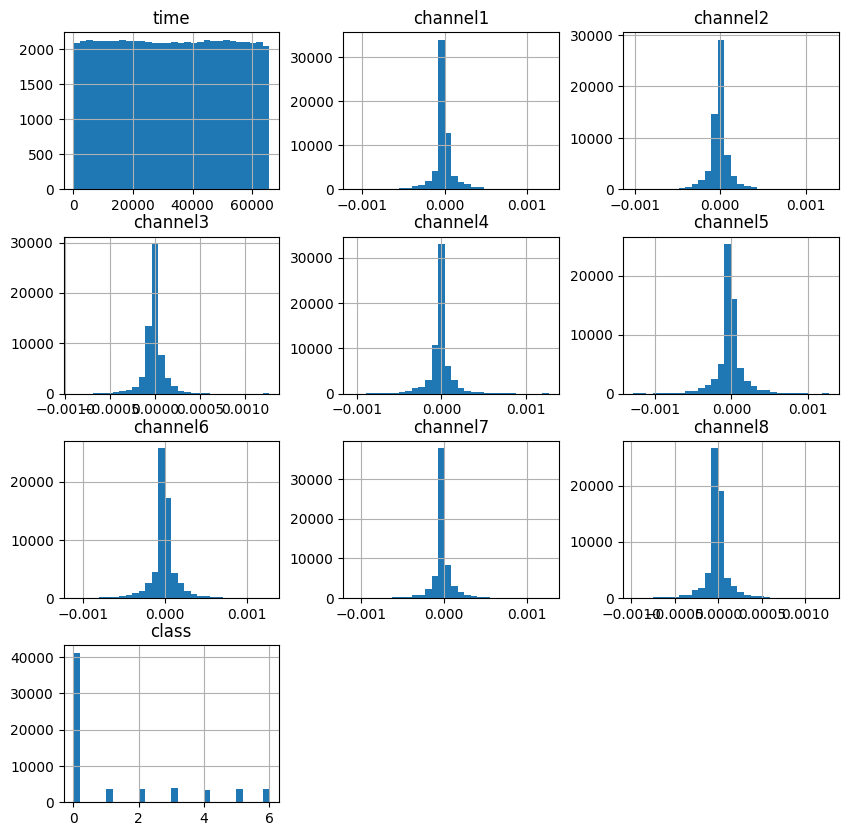

In [ ]:
# Histogramme pour les variables numériques
import matplotlib.pyplot as plt
data.hist(bins=30, figsize=(10, 10))
plt.show()

La classe 0 représente des **"données non marquées"** ou une situation de "repos" ou "absence de geste", il est **normal qu'elle soit plus fréquente**, surtout dans les contextes où les gestes spécifiques ne sont exécutés que brièvement et/ou moins fréquemment. Ensuite la classe 3 est la plus fréquente. D'accord que ce 'nest pas très visible sur mon histogramme.

**Heatmap**

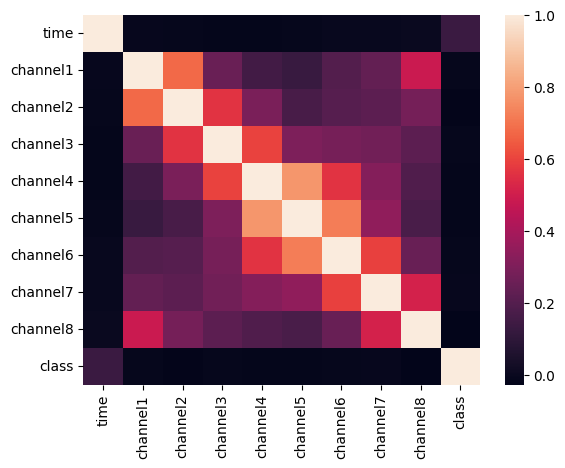

In [ ]:
# heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr())
plt.show()

On observe pas une corrélation entre un channel et class. Il n'y a pas un channel qui a plus d'impact que d'autres sur la classe.

**2. Découper la série temporelle de manière à récupérer plusieurs séries à label unique**

In [ ]:
# Identifier où les changements de label se produisent
changes = data['class'].diff().ne(0)  # diff() calcule la différence entre chaque élément et son précédent
change_indices = changes[changes].index.tolist()  # récupérer les indices des changements

# Ajouter le premier index de la série et le dernier index de la série pour compléter les sous-séries
if 0 not in change_indices:
    change_indices.insert(0, 0)
change_indices.append(len(data))

# Créer les sous-séries
sub_series = []
for i in range(len(change_indices) - 1):
    sub_series.append(data.iloc[change_indices[i]:change_indices[i + 1]])

# Afficher le résultat
# for index, series in enumerate(sub_series):
#     print(f"Sous-série {index + 1} avec label unique:")
#     print(series.head())  # afficher les premières lignes de chaque sous-série
#     print("\n")


**3. Utiliser la TDA pour créer un modèle de classification. Que peut on dire?**

3.1 Étape 1: Fonction pour calculer le diagramme de persistance

In [ ]:
!pip install gudhi
!pip install giotto-tda

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 554.6/554.6 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceEntropy

In [ ]:
# Étape 1 : Charger les données
url = "https://remivaucher.github.io/files/1_raw_data_13-12_22.03.16.txt"
data = pd.read_csv(url, sep="\t")

# Inspecter les premières lignes
print(data.head())

# Étape 2 : Séparer les caractéristiques (X) et les labels (y)
# Supposez que 'label' est la colonne cible (à adapter en fonction de vos données)
X = data.drop(columns=['class'])  # Remplacez 'label' par le nom réel de la colonne cible
y = data['class']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

   time  channel1  channel2  channel3  channel4  channel5  channel6  channel7  \
0     1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
1     5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
2     6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
3     7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
4     8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   

   channel8  class  
0  -0.00001      0  
1  -0.00001      0  
2   0.00001      0  
3   0.00001      0  
4   0.00001      0  


In [ ]:
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceEntropy
import numpy as np

# Reshape les données pour qu'elles soient dans le format attendu
X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Étape 3 : Extraction des caractéristiques topologiques
# Appliquer Vietoris-Rips Persistence
tda = VietorisRipsPersistence(metric='euclidean', homology_dimensions=(0, 1, 2))
X_train_tda = tda.fit_transform(X_train_reshaped)
X_test_tda = tda.transform(X_test_reshaped)

# Calcul de l'entropie de persistance pour réduire la dimensionnalité
pe = PersistenceEntropy()
X_train_features = pe.fit_transform(X_train_tda)
X_test_features = pe.transform(X_test_tda)


In [ ]:
# Étape 4 : Entraîner un modèle de classification
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_features, y_train)

# Prédictions
y_pred = clf.predict(X_test_features)

# Étape 5 : Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.64903212194736
Classification Report:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79     12305
           1       0.00      0.00      0.00      1160
           2       0.00      0.00      0.00      1061
           3       0.00      0.00      0.00      1159
           4       0.00      0.00      0.00      1039
           5       0.00      0.00      0.00      1086
           6       0.00      0.00      0.00      1149

    accuracy                           0.65     18959
   macro avg       0.09      0.14      0.11     18959
weighted avg       0.42      0.65      0.51     18959



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceEntropy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Charger les données
url = "https://remivaucher.github.io/files/1_raw_data_13-12_22.03.16.txt"
data = pd.read_csv(url, sep="\t")

# Étape 1 : Identifier les changements de labels et créer les sous-séries
changes = data['class'].diff().ne(0)  # Identifier les changements de labels
change_indices = changes[changes].index.tolist()

if 0 not in change_indices:
    change_indices.insert(0, 0)
change_indices.append(len(data))

sub_series = [data.iloc[change_indices[i]:change_indices[i + 1]] for i in range(len(change_indices) - 1)]

# Étape 2 : Extraire les caractéristiques TDA pour chaque sous-série
tda = VietorisRipsPersistence(metric='euclidean', homology_dimensions=(0, 1))
pe = PersistenceEntropy()

features = []
labels = []

for series in sub_series:
    # Retirer la colonne de classe pour ne garder que les caractéristiques
    X = series.drop(columns=['class']).values
    # Reshape pour s'assurer que les données sont compatibles avec la TDA
    X_reshaped = X.reshape((1, X.shape[0], X.shape[1]))
    # Calculer les diagrammes de persistance
    persistence = tda.fit_transform(X_reshaped)
    # Calculer l'entropie de persistance
    feature_vector = pe.fit_transform(persistence)
    features.append(feature_vector[0])  # Ajouter les caractéristiques extraites
    labels.append(series['class'].iloc[0])  # Le label est le même pour toute la sous-série

# Étape 3 : Entraîner un modèle de classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prédictions
y_pred = clf.predict(X_test)

# Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Je n'arrive pas à expliquer le diagramme de persistence